# AIT- 526 Lab-2 Text summarization and Webscraping

## Task -1 Text Summarization with Word Frequencies

In [1]:
#1.1 web scraping technique with BeautifulSoup to get the text data from the specified data location on the Wikipedia webpage.
import bs4 as bs#BeautifulSoup
import urllib.request
import re,nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('stopwords')
from heapq import nlargest

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#scrapping the text data from webpage with Bs
def _scrape_webpage(url):
    
    scraped_textdata = urllib.request.urlopen(url)
    textdata = scraped_textdata.read()
    parsed_textdata = bs.BeautifulSoup(textdata,'lxml')
    paragraphs = parsed_textdata.find_all('p')
    formated_text = ""
    for para in paragraphs:
        formated_text += para.text
    return formated_text


In [3]:
mytext = _scrape_webpage('https://en.wikipedia.org/wiki/Natural_language_processing')

In [4]:
#1.2 Preprocess the text data and must include word tokenization, stop words and punctuation removal, etc.
sentences = nltk.sent_tokenize(mytext)
tokens = nltk.word_tokenize(mytext)

words = [w.lower() for w in tokens]
lToStr = ' '.join([str(elem) for elem in words])
without_pun=re.split(r'\W+', lToStr)

stop_words= [word for word in without_pun if word.lower() not in stopwords.words('english')]

print(FreqDist(tokens))
print(FreqDist(without_pun))
print(FreqDist(stop_words))

<FreqDist with 565 samples and 1363 outcomes>
<FreqDist with 534 samples and 1188 outcomes>
<FreqDist with 469 samples and 760 outcomes>


In [5]:
#1.3 calculate word frequencies or weighted word frequencies
freq_dist = FreqDist(stop_words)
print(freq_dist.most_common(15))

[('language', 24), ('natural', 16), ('nlp', 15), ('cognitive', 13), ('processing', 12), ('based', 10), ('linguistics', 9), ('e', 9), ('tasks', 9), ('approach', 9), ('statistical', 8), ('neural', 7), ('machine', 7), ('g', 7), ('learning', 6)]


In [6]:
#Score and rank the sentences

# Function to score the sentences
def score_sentences(sentences, freq_dist):
    sentence_scores = {}
    for sentence in sentences:
        for word in word_tokenize(sentence.lower()):
            if word in freq_dist:
                if len(sentence.split(' ')) < 30:  # We limit sentence length to avoid long sentences dominating
                    if sentence not in sentence_scores:
                        sentence_scores[sentence] = freq_dist[word]
                    else:
                        sentence_scores[sentence] += freq_dist[word]
    return sentence_scores


In [7]:
# Function to rank sentences based on scores
def rank_sentences(sentence_scores, n):
    sorted_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)
    top_sentences = [sentence for sentence, score in sorted_sentences[:n]]
    return top_sentences

In [8]:
def build_summary(top_sentences, word_count_limit=None, percentage_limit=None):
    summary = ' '.join(top_sentences)

    if word_count_limit:
        summary_words = word_tokenize(summary)
        summary_words = summary_words[:word_count_limit]
        summary = ' '.join(summary_words)

    if percentage_limit:
        summary_words = word_tokenize(summary)
        total_words = len(summary_words)
        summary_words = summary_words[:int(total_words * percentage_limit / 100)]
        summary = ' '.join(summary_words)

    return summary

#summary_sentences = heapq.nlargest(27, sentence_scores, key=sentence_scores.get)

#questions = '\n\n'.join(summary_sentences[:12])

#summary = '\n\n'.join(summary_sentences[12:])


In [9]:
sentence_scores = score_sentences(sentences, freq_dist)
top_sentences = rank_sentences(sentence_scores, n=3)
print(top_sentences)

# Build summary based on sentence count, word count, and percentage
summary_a = build_summary(top_sentences, word_count_limit=50)
summary_b = build_summary(top_sentences, percentage_limit=20)

['Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing.', 'That popularity was due partly to a flurry of results showing that such techniques[11][12] can achieve state-of-the-art results in many natural language tasks, e.g., in language modeling[13] and parsing.', 'In the 2010s, representation learning and deep neural network-style (featuring many hidden layers) machine learning methods became widespread in natural language processing.']


In [10]:
print("(a) Sentence count = 3")
print("(b)Word count = 50")
print("Summary:")
print(summary_a)
print("\n")
print("Sentence count = 3")
print("(c)Percentage = 20%")
print("Summary:")
print(summary_b)

(a) Sentence count = 3
(b)Word count = 50
Summary:
Starting in the late 1980s , however , there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing . That popularity was due partly to a flurry of results showing that such techniques [ 11 ] [ 12 ] can achieve state-of-the-art


Sentence count = 3
(c)Percentage = 20%
Summary:
Starting in the late 1980s , however , there was a revolution in natural language processing with the


## Task-2 Text Summarization with N-grams

In [11]:
#2.1 Generate N-grams with NLTK:
from nltk.util import ngrams

#function 
def generate_ngrams(text, n):
    n_grams = ngrams(nltk.word_tokenize(text.lower()),n)
    return [' '.join(gram) for gram in ngrams]

<FreqDist with 1313 samples and 1361 outcomes>
[(('natural', 'language', 'processing'), 9), (('in', 'natural', 'language'), 4), (('language', 'processing', '.'), 4), (('(', 'e.g.', ','), 3), ((',', 'e.g.', ','), 3), (('grammar', ',', '['), 3), (('language', 'processing', '('), 2), (('processing', '(', 'nlp'), 2), (('(', 'nlp', ')'), 2), (('is', 'an', 'interdisciplinary'), 2), (('and', 'linguistics', '.'), 2), ((',', 'such', 'as'), 2), ((')', 'machine', 'learning'), 2), (('machine', 'learning', 'approaches'), 2), (('at', 'the', 'time'), 2)]


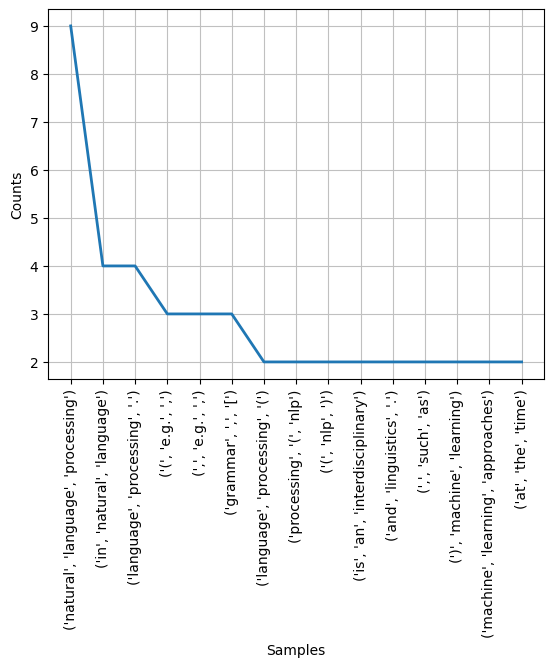

<Axes: xlabel='Samples', ylabel='Counts'>

In [12]:
#2.2 use nltk to get n grams and its frequencies
bigrams = list(ngrams(words,3))

#print(bigrams)

freq_dist = FreqDist(bigrams)
print(freq_dist)
print(freq_dist.most_common(15))
freq_dist.plot(15)

Most common 3 -grams:
natural language processing : 9
in natural language : 4
language processing . : 4
( e.g. , : 3
, e.g. , : 3
grammar , [ : 3
language processing ( : 2
processing ( nlp : 2
( nlp ) : 2
is an interdisciplinary : 2
and linguistics . : 2
, such as : 2
) machine learning : 2
machine learning approaches : 2
at the time : 2
of natural language : 2
natural language . : 2
of symbolic nlp : 2
in the late : 2
the late 1980s : 2
<FreqDist with 1312 samples and 1360 outcomes>


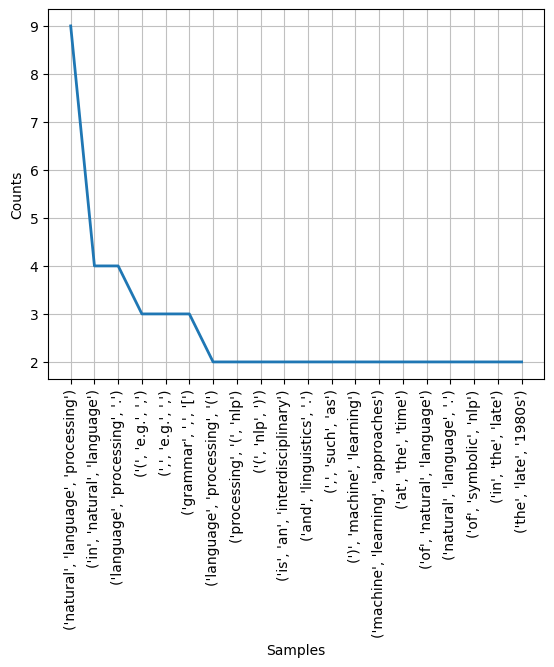

<Axes: xlabel='Samples', ylabel='Counts'>

In [13]:
def ngram_frequencies(mytext, n):
    # Tokenize the input text into words
    words = word_tokenize(mytext.lower())
    
    # Generate N-grams of size n
    n_grams = ngrams(words, n)
    
    # Calculate the frequency distribution of N-grams
    freq_dist = FreqDist(n_grams)
    
    return freq_dist

ngram_size = 3
freq_dist = ngram_frequencies(mytext, ngram_size)

# Print the most common N-grams and their frequencies
print("Most common", ngram_size, "-grams:")
for ngram, freq in freq_dist.most_common(20):
    print(' '.join(ngram), ":", freq)

print(FreqDist(freq_dist))
freq_dist.plot(20)


In [14]:
def calculate_sentence_scores_ngram(sent_tokens, ngram_freqs, n_grams):
    sentence_scores = {}
    for sentence in sent_tokens:
        for ngram in n_grams:
            if ngram in ngram_freqs:
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = ngram_freqs[ngram]
                else:
                    sentence_scores[sentence] += ngram_freqs[ngram]
    return sentence_scores

In [15]:
#b) weighted frequency occurrences
def find_weighted_frequency(freq_dist):
    total_ngrams = sum(freq_dist.values())
    weighted_frequencies = {ngram: freq/ total_ngrams for ngram, freq in freq_dist.items()}
    return weighted_frequencies

ngram_freqs = find_weighted_frequency(freq_dist)
list(ngram_freqs.items())[0:20]

[(('natural', 'language', 'processing'), 0.006617647058823529),
 (('language', 'processing', '('), 0.0014705882352941176),
 (('processing', '(', 'nlp'), 0.0014705882352941176),
 (('(', 'nlp', ')'), 0.0014705882352941176),
 (('nlp', ')', 'is'), 0.0007352941176470588),
 ((')', 'is', 'an'), 0.0007352941176470588),
 (('is', 'an', 'interdisciplinary'), 0.0014705882352941176),
 (('an', 'interdisciplinary', 'subfield'), 0.0007352941176470588),
 (('interdisciplinary', 'subfield', 'of'), 0.0007352941176470588),
 (('subfield', 'of', 'computer'), 0.0007352941176470588),
 (('of', 'computer', 'science'), 0.0007352941176470588),
 (('computer', 'science', 'and'), 0.0007352941176470588),
 (('science', 'and', 'linguistics'), 0.0007352941176470588),
 (('and', 'linguistics', '.'), 0.0014705882352941176),
 (('linguistics', '.', 'it'), 0.0007352941176470588),
 (('.', 'it', 'is'), 0.0007352941176470588),
 (('it', 'is', 'primarily'), 0.0007352941176470588),
 (('is', 'primarily', 'concerned'), 0.0007352941176

In [16]:
def calculate_sentence_scores_ngram(sent_tokens, ngram_freqs, n_grams):
    sentence_scores = {}
    for sentence in sent_tokens:
        # Tokenize the sentence into N-grams
        sentence_ngrams = list(ngrams(word_tokenize(sentence.lower()), n_grams))
        
        # Calculate the score for the sentence based on the sum of frequencies of its N-grams
        score = sum(ngram_freqs.get(ngram, 0) for ngram in sentence_ngrams)
        
        sentence_scores[sentence] = score
    return sentence_scores

In [17]:
def get_summary_ngram(mytext, n, num_sentences=3):
    # Tokenize the text into sentences
    sent_tokens = nltk.sent_tokenize(mytext)
    
    # Calculate sentence scores based on N-grams
    sentence_scores = calculate_sentence_scores_ngram(sent_tokens, ngram_freqs, n)
    
    # Get the top N sentences with highest scores
    top_sentences = nlargest(num_sentences, sentence_scores, key=sentence_scores.get)
    
    # Re-order the top sentences in their original order
    summarized_text = ' '.join([sentence for sentence in sent_tokens if sentence in top_sentences])
    
    return summarized_text


# Specify the size of N-grams and the number of sentences in the summary
ngram_size = 3
num_sentences = 3

# Generate the summary
summary = get_summary_ngram(mytext, ngram_size, num_sentences)
print(summary)

As an example, George Lakoff offers a methodology to build natural language processing (NLP) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[48] with two defining aspects:
Ties with cognitive linguistics are part of the historical heritage of NLP, but they have been less frequently addressed since the statistical turn during the 1990s. Nevertheless, approaches to develop cognitive models towards technically operationalizable frameworks have been pursued in the context of various frameworks, e.g., of cognitive grammar,[51] functional grammar,[52] construction grammar,[53] computational psycholinguistics and cognitive neuroscience (e.g., ACT-R), however, with limited uptake in mainstream NLP (as measured by presence on major conferences[54] of the ACL). [55] Likewise, ideas of cognitive NLP are inherent to neural models multimodal NLP (although rarely made explicit)[56] and developments in artificial intelligence, specifically to

###### Comparisons
### Task-1

######  For the task-1, it is asked to summarize the text based on word frequencies, such that by printing most importance sentences or top ranked sentences. 

###### The conditions given are 1) top_sentences =3, like selecting the fixed number of top_frequency sentences 2) word_count= 50, Limiting the total number ofwords used for summarization 3) Percentage_limit =20, Using a specifies percentage to tal words for summarization.

##### Therefore, the last sentence for percentage was incomplete due to the limitation.

### Task-2 

##### For the task-2 , asked us to summarize the text based on n-grams,specifically tri-grams(sequences of three words).

##### Here the summarization is done by selecting a fixed number of trigrams and the corresponding sentences that contain these tri-grams. Typically, three sentences containing the selected tri-grams are chosen for summarization, it provides more context based sentences rather than individual words.

##### Therefore, the summary generated by N-grams may offer more nice context compared to the word frequencies.

#### Finally, the main difference is that first summarization focuses on importance of word frequencies of individual words and sentences. second summarization focuses on context provided by sequences of words.



### References

[1]Text summarization: https://medium.com/@ashins1997/text-summarization-e702168569f6 by Ashin Shakya on April 25, 2020

[2] Dr.Liao's Code Example and tutorials :https://mymasonportal.gmu.edu/ultra/courses/_510861_1/cl/outline

[3] Video tutorials: Given in Blacboard: https://mymasonportal.gmu.edu/ultra/courses/_510861_1/cl/outline